<a href="https://colab.research.google.com/github/Jose-Balocchi/Retail---Predicciones-de-ventas/blob/main/05_Proyecto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar biblioteca Pandas

In [ ]:
import pandas as pd

predicciones = '/content/04 sales_predictions.csv'
df = pd.read_csv(predicciones)
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Ahora revisaremos los datos

In [ ]:
# numero de filas y columnas

df.shape

(8523, 12)

In [ ]:
# Informacion general

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Que podemos sacar de esto:

**Datos faltantes: columnas Item_Weight y Outlet_size**


In [ ]:
# Revisaremos si hay datos duplicados

df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [ ]:
# Con lo anterior no sabemos si hay duplicados, asi que sumaremos los True y nos daremos cuenta de que no hay duplicados.

df.duplicated().sum()

0

In [ ]:
# Volvamos a los valores faltantes.

df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Veamos un head de las columnas involucradas.

df['Item_Weight'].head()

0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
Name: Item_Weight, dtype: float64

In [ ]:
# Veamos los valores generales de esta columna

df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [ ]:
# Veamos la moda y mediana

print('Moda')
df['Item_Weight'].mode()



Moda


0    12.15
Name: Item_Weight, dtype: float64

In [ ]:
print('Mediana')
df['Item_Weight'].median()

Mediana


12.6

In [ ]:
# El promedio esta bastante cerca de la moda y mediana, por lo que optare por esa opcion para rellenar los datos faltantes de esta columna

promedio = df['Item_Weight'].mean()

promedio



12.857645184135976

In [ ]:
# Ahora rellenamos

df['Item_Weight'].fillna(promedio, inplace = True)

In [ ]:
# Veamos si se rellenaron

df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Vamos a ver la otra columna ahora
#Es una variable categorica.

# Veamos cuantos de cada una de las categorias hay

df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
# Como son 2410 valores faltantes, que son muchos, vamos a ver si hay alguna otra columna que nos pueda entregar info. Para ello filtramos el df solo por los valores nan de esa coluimna

df_nan = df[df['Outlet_Size'].isna()]
df_nan

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [ ]:
# Veamos los valores de las columnas para ver si hay algun dato relevante
df_nan['Outlet_Location_Type'].value_counts()
# aca nos damos cuenta que los nan son solo tier 2 y tier 3


Tier 2    1855
Tier 3     555
Name: Outlet_Location_Type, dtype: int64

In [ ]:
df_nan['Outlet_Type'].value_counts()
# aca nos damos cuenta de que los nan son solo type 1 y grocery

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [ ]:
# Veamos en el df original los tamanos asociados a esos valores

identificador_size = df.groupby(['Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size'])['Item_Outlet_Sales'].mean()
identificador_size
# De lo anterior podemos ver dos cosas, que las grocery store son solo small, y que los tier 2 son solo small.

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small           340.329723
                      Supermarket Type1  Medium         2348.354635
                                         Small          2277.844267
Tier 2                Supermarket Type1  Small          2438.841866
Tier 3                Supermarket Type1  High           2298.995256
                      Supermarket Type2  Medium         1995.498739
                      Supermarket Type3  Medium         3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
identificador_size_nan = df_nan.groupby(['Outlet_Location_Type', 'Outlet_Type'])['Item_Outlet_Sales'].mean()
identificador_size_nan
#juntando lo anterior, podemos ver que los faltantes son todos small

Outlet_Location_Type  Outlet_Type      
Tier 2                Supermarket Type1    2266.410119
Tier 3                Grocery Store         339.351662
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
# Por relacion podemos ver que los faltantes son small.

df['Outlet_Size'].fillna('Small', inplace = True)

In [ ]:
df['Outlet_Size'].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
# Veamos si se rellenaron

df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
# Veamos ahora si tenemos que corregir alguna otra variable

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Aca vemos que hay categorias duplicadas

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Veamos otra variable categorica

df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
# Analicemos de todas formas los valores unicos por columna

df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
# Ahora mostremos datos resumen para cada columna

df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


# *Proyecto 1 - Parte 3 *

Vamos a explorar los datos a través de histogramas, boxplots, mapas de calor y correlación

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<Axes: >

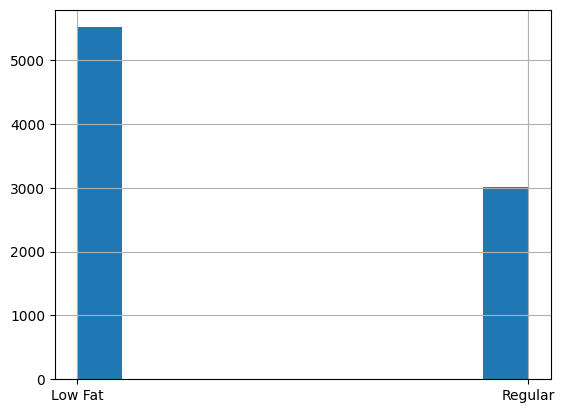

In [ ]:
# Vamos con histogramas

df['Item_Fat_Content'].hist()

<Axes: >

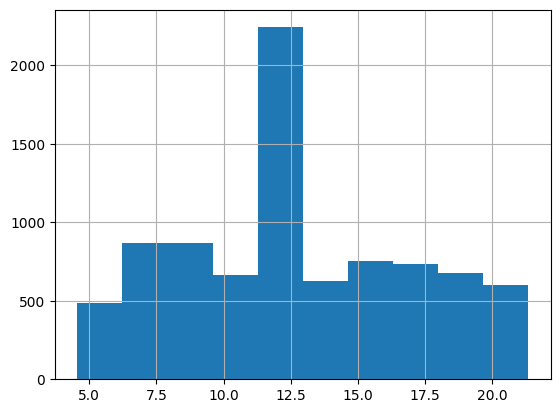

In [ ]:
df['Item_Weight'].hist()

<Axes: >

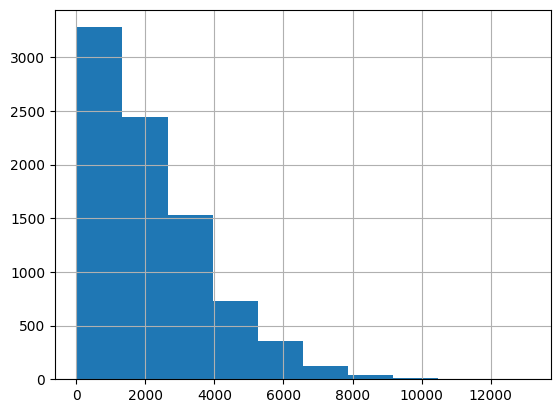

In [ ]:
df['Item_Outlet_Sales'].hist()

array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>],
       [<Axes: title={'center': 'Item_Outlet_Sales'}>, <Axes: >]],
      dtype=object)

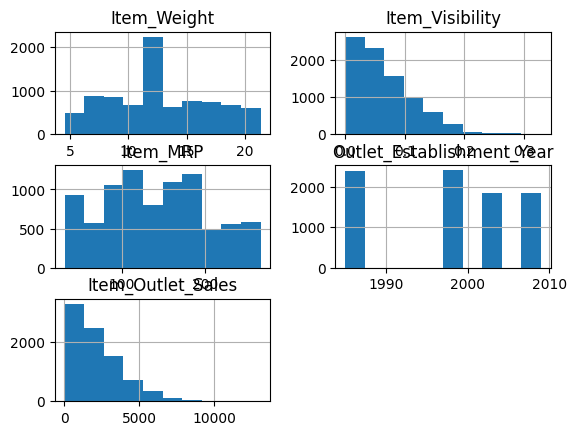

In [ ]:
df.hist()

In [ ]:
# Ahora seria interesante comparar columnas. 

# Comparemos la columna tipo de outlet con las ventas 

# Lo primero es definir la serie de ventas

ventas = df['Item_Outlet_Sales']

In [ ]:
tipo_de_outlet = df['Outlet_Type']
tipo_de_outlet

0       Supermarket Type1
1       Supermarket Type2
2       Supermarket Type1
3           Grocery Store
4       Supermarket Type1
              ...        
8518    Supermarket Type1
8519    Supermarket Type1
8520    Supermarket Type1
8521    Supermarket Type2
8522    Supermarket Type1
Name: Outlet_Type, Length: 8523, dtype: object

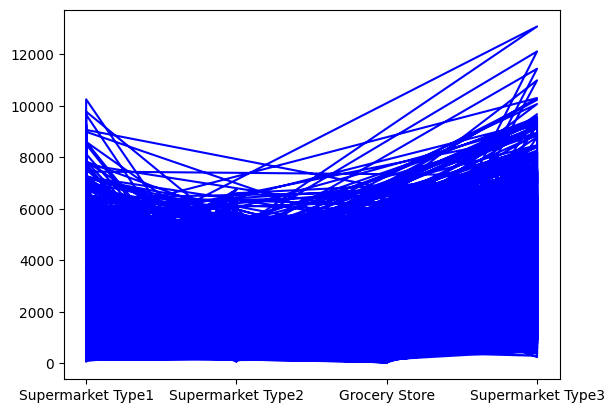

In [ ]:
# vamos a ver si funciona un grafico que los relacione --- no funciona

plt.plot(tipo_de_outlet,ventas, 'b')

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# esta info no es muy valiosa pero la dejaremos para ver como se ve un groupby de dos criterios graficados.
grafico_outlet = df.groupby(['Outlet_Type','Item_Fat_Content'])['Item_Outlet_Sales'].sum()
grafico_outlet


Outlet_Type        Item_Fat_Content
Grocery Store      Low Fat             2.406814e+05
                   Regular             1.273529e+05
Supermarket Type1  Low Fat             8.257521e+06
                   Regular             4.659822e+06
Supermarket Type2  Low Fat             1.201305e+06
                   Regular             6.505179e+05
Supermarket Type3  Low Fat             2.204588e+06
                   Regular             1.249338e+06
Name: Item_Outlet_Sales, dtype: float64

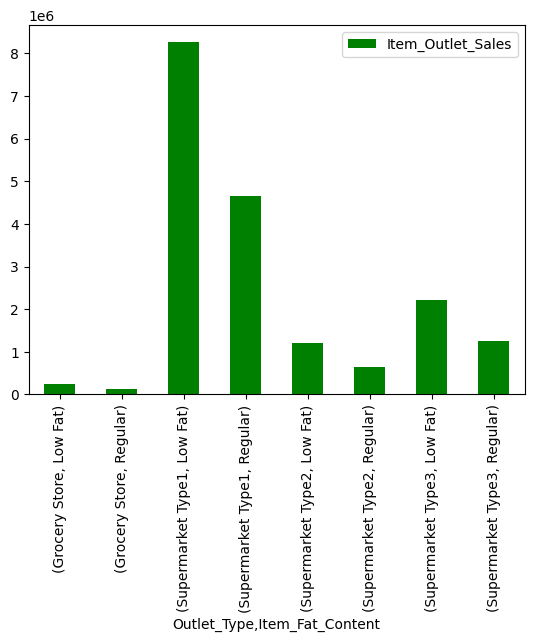

In [ ]:
grafico_outlet.plot.bar(color = 'green')
plt.xticks(rotation = 90)
plt.legend()

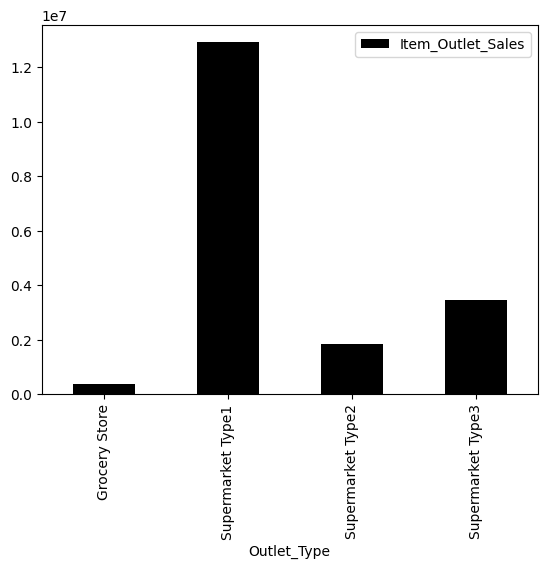

In [ ]:
grafico_outlet2 = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()
grafico_outlet2.plot(kind = 'bar', color = 'black')
plt.xticks(rotation = 90)
plt.legend()
# aca podemos ver la diferencia de ventas entre los tipos de locales

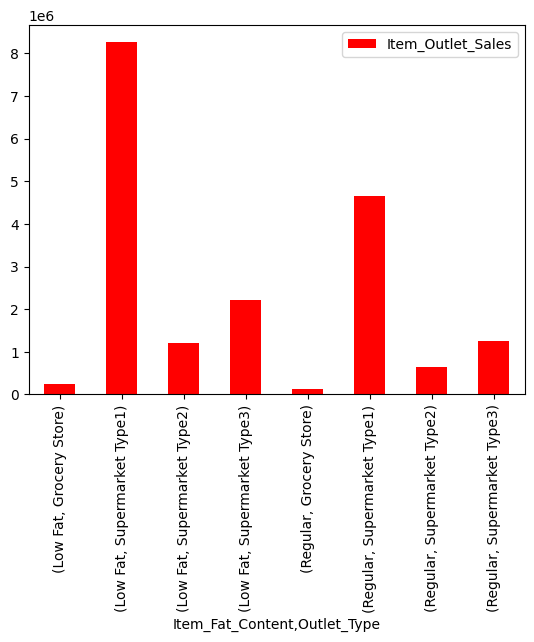

In [ ]:
# ahora veremos la diferencia de ventas de los tipos de producto por nivel de grasa
grafico_tipo_comida_grasa = df.groupby(['Item_Fat_Content', 'Outlet_Type'])['Item_Outlet_Sales'].sum()
grafico_tipo_comida_grasa.plot.bar(color = 'red')
plt.xticks(rotation = 90)
plt.legend()
# aca podemos


# aca podemos

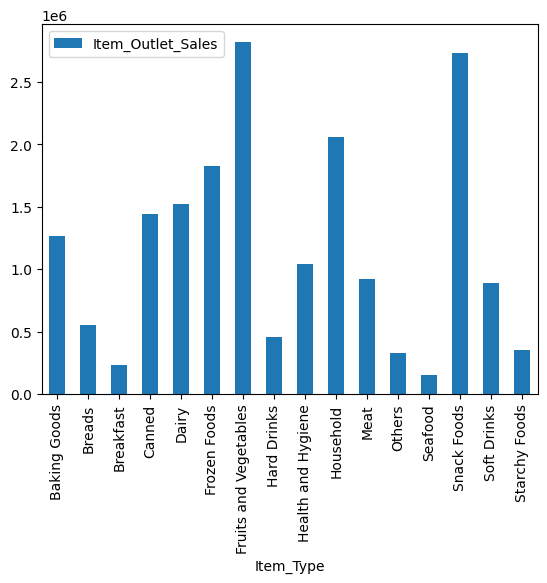

In [ ]:
# ahora veremos la diferencia de ventas de los tipos de producto
grafico_tipo_comida = df.groupby('Item_Type')['Item_Outlet_Sales'].sum()
grafico_tipo_comida.plot.bar()
plt.xticks(rotation = 90)
plt.legend()

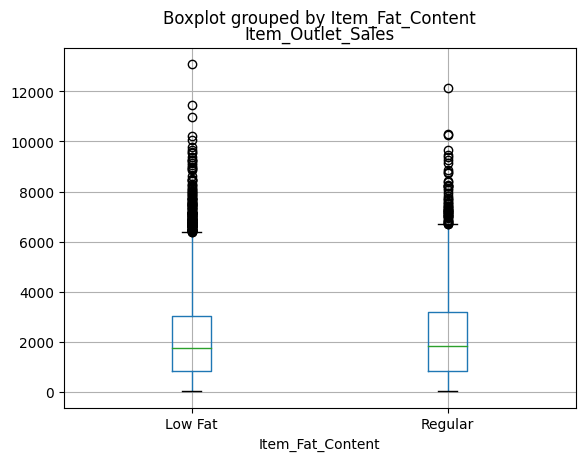

In [ ]:
# Vamos a ver boxplots ahora
# algo interesante sera ver la distribucion de las ventas por nivel de grasa de los productos

df.boxplot(column = 'Item_Outlet_Sales', by = 'Item_Fat_Content');

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

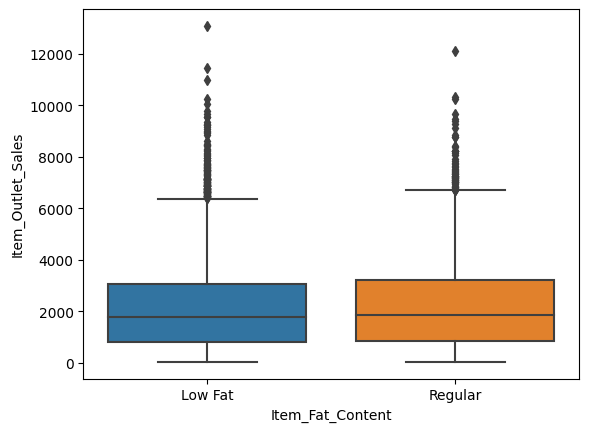

In [ ]:
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)

In [ ]:
# ambos tienen distribuciones parecidas, pero low fat tiene mas outliers

In [ ]:
df.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

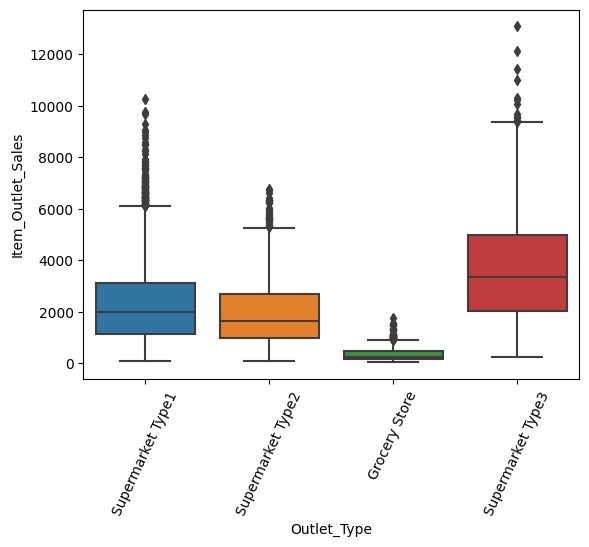

In [ ]:
# Veamos otros boxplots

sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.xticks(rotation = 65)


In [ ]:
# esto esta interesante. 

In [ ]:
# Vamos ahora con mapas de calor

# creamos primero la correlacion

corr = df.corr()

<Axes: >

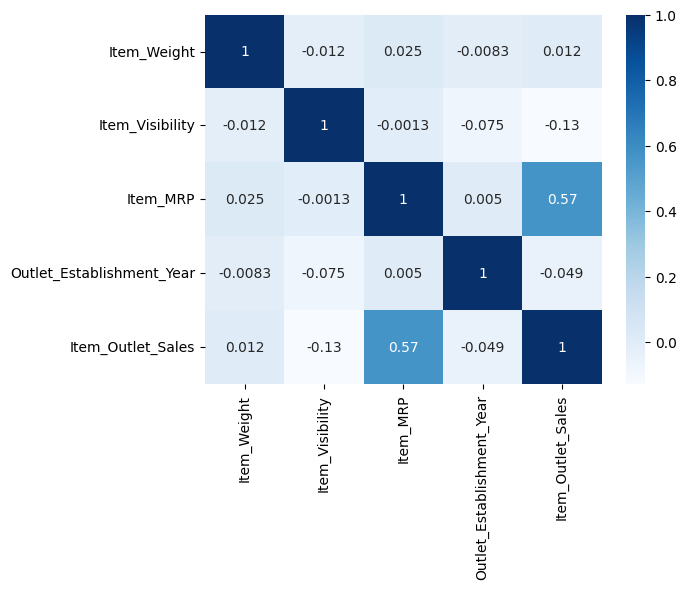

In [ ]:
sns.heatmap(corr, cmap = 'Blues', annot= True)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

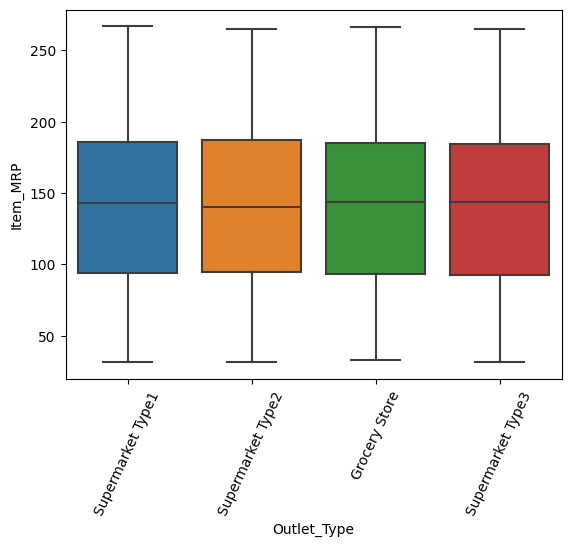

In [ ]:
# dada la relacion entre las ventas e ITem MRP, veamos un boxplot por tipo de outlet.
# son todos muy parecidos

sns.boxplot(x='Outlet_Type', y='Item_MRP', data=df)
plt.xticks(rotation = 65)


## **Proyecto 1 - Parte 4** 

Vamos ahora a hacer nuevos graficos con mejor informacion y diseño

In [ ]:
# Vamos con las bases y bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# ahora veremos la diferencia de ventas de los tipos de producto por nivel de grasa
grafico_tipo_comida_grasa = df.groupby(['Outlet_Type', 'Item_Fat_Content'])['Item_Outlet_Sales'].sum().sort_values(ascending = False)
grafico_tipo_comida_grasa = grafico_tipo_comida_grasa.reset_index()
grafico_tipo_comida_grasa

,Outlet_Type,Item_Fat_Content,Item_Outlet_Sales
0,Supermarket Type1,Low Fat,8.257521e+06
1,Supermarket Type1,Regular,4.659822e+06
2,Supermarket Type3,Low Fat,2.204588e+06
3,Supermarket Type3,Regular,1.249338e+06
4,Supermarket Type2,Low Fat,1.201305e+06
5,Supermarket Type2,Regular,6.505179e+05
6,Grocery Store,Low Fat,2.406814e+05
7,Grocery Store,Regular,1.273529e+05


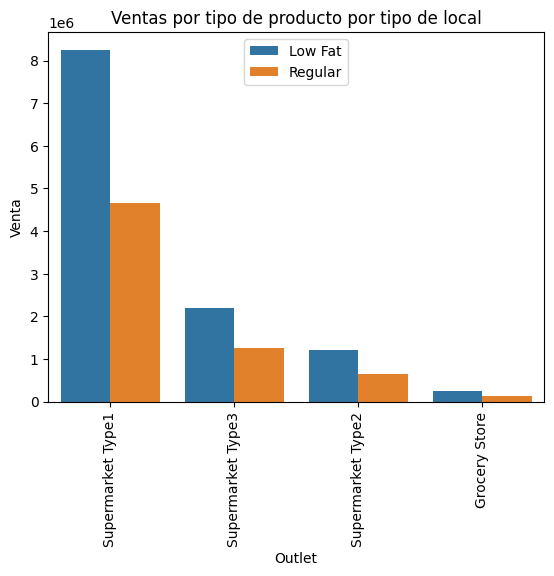

In [ ]:
# Grafiquemos

sns.barplot(x = grafico_tipo_comida_grasa['Outlet_Type'], y = grafico_tipo_comida_grasa['Item_Outlet_Sales'], hue= grafico_tipo_comida_grasa['Item_Fat_Content'])
plt.title('Ventas por tipo de producto por tipo de local')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper center')
plt.xlabel('Outlet')
plt.ylabel('Venta')
plt.show()

In [ ]:
# Veamos ahora lo anterior, pero clasificado por tamano de retail

grafico_tipo_comida_size = df.groupby(['Outlet_Size', 'Item_Fat_Content'])['Item_Outlet_Sales'].sum().sort_values(ascending = False)
grafico_tipo_comida_size = grafico_tipo_comida_size.reset_index()


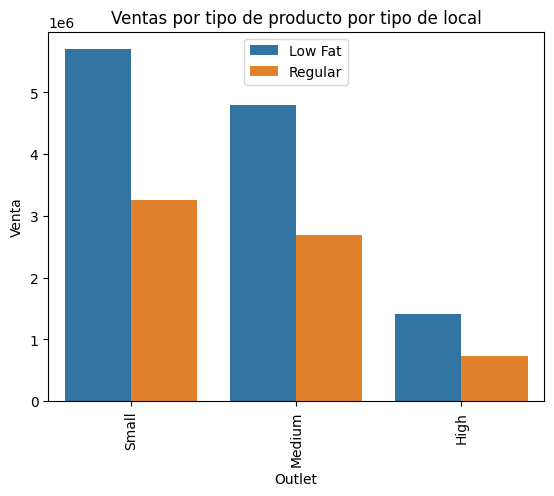

In [ ]:
# Grafiquemos

sns.barplot(x = grafico_tipo_comida_size['Outlet_Size'], y = grafico_tipo_comida_size['Item_Outlet_Sales'], hue= grafico_tipo_comida_size['Item_Fat_Content'])
plt.title('Ventas por tipo de producto por tipo de local')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper center')
plt.xlabel('Outlet')
plt.ylabel('Venta')
plt.show()

In [ ]:
# ahora veremos la diferencia de ventas de los tipos por nivel de grasa por tipo de local
grafico_tipo_comida_grasa1 = df.groupby(['Item_Fat_Content', 'Outlet_Type'])['Item_Outlet_Sales'].sum().sort_values(ascending = False)
grafico_tipo_comida_grasa1 = grafico_tipo_comida_grasa1.reset_index()


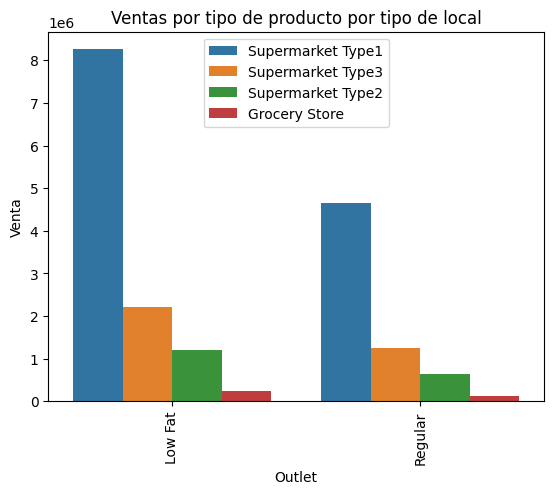

In [ ]:
# Grafiquemos

sns.barplot(x = grafico_tipo_comida_grasa1['Item_Fat_Content'], y = grafico_tipo_comida_grasa1['Item_Outlet_Sales'], hue= grafico_tipo_comida_grasa1['Outlet_Type'])
plt.title('Ventas por tipo de producto por tipo de local')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper center')
plt.xlabel('Outlet')
plt.ylabel('Venta')
plt.show()

In [ ]:
grafico_tipo_comida3 = df.groupby('Item_Type')['Item_Outlet_Sales'].sum()
grafico_tipo_comida3 = grafico_tipo_comida3.reset_index()
data = grafico_tipo_comida3['Item_Outlet_Sales']
labels = grafico_tipo_comida3['Item_Type']

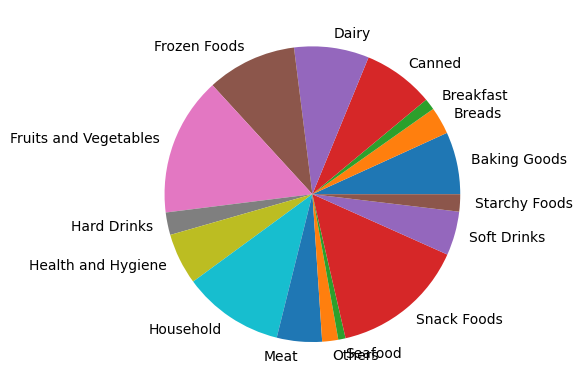

In [ ]:
# Aca veremos la venta de cada producto a nivel general
plt.pie(data, labels = labels)
plt.show()

In [ ]:
# Veamos ahora las ventas del tipo de producto general por tipo de outlet
grafico_tipo_comida4 = df.groupby(['Outlet_Type', 'Item_Type'])['Item_Outlet_Sales'].sum().sort_values(ascending = False)
grafico_tipo_comida4 = grafico_tipo_comida4.reset_index()


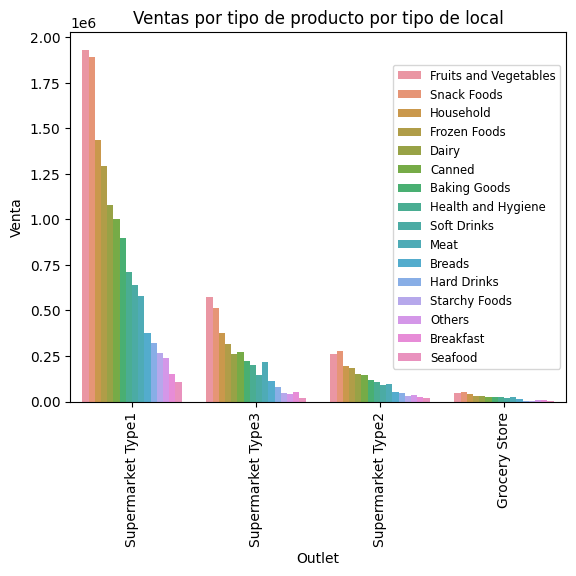

In [ ]:
sns.barplot(x = grafico_tipo_comida4['Outlet_Type'], y = grafico_tipo_comida4['Item_Outlet_Sales'], hue= grafico_tipo_comida4['Item_Type'])
plt.title('Ventas por tipo de producto por tipo de local')
plt.xticks(rotation = 90)
plt.legend(loc = 'center right', fontsize= 'small')
plt.xlabel('Outlet')
plt.ylabel('Venta')
plt.show()

# Proyecto 1 - Parte 5 (base)

1. Identifiquen el objetivo (X) y las características (y): Asignen la columna "Item_Outlet_Sales" somo el objetivo y el resto de las variables relevantes como el matriz de características.  
2. Realicen un train test split 
3. Creen un pipeline de preprocesamiento para preparar el conjunto de datos para el aprendizaje automático.

In [1]:
# Vamos con las bibliotecas y datos

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [3]:
df = pd.read_csv('/content/10_sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
# Vamos a resolver el problema anterior (valores mal ingresados)

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

In [17]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [14]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [15]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [5]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [24]:
# Vamos con el objetivo y las caracteristicas

X = df.drop(columns = ['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
# Antes de los cat selector, voy a aislar las columnas que requieran alguna imputacion manual o que no requieran imputacion alguna

# Estas columnas son Item identifier, Outlet_Establishment_Year y Outlet Size (que sabemos que los na se rellenan con small)

otros_train_df = pd.DataFrame(X_train[['Item_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size']]).reset_index(drop = True)
otros_test_df = pd.DataFrame(X_test[['Item_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size']]).reset_index(drop = True)
otros_train_df.head()

,Item_Identifier,Outlet_Establishment_Year,Outlet_Size
0,NCG06,2009,Medium
1,FDV57,2009,Medium
2,FDM27,1999,Medium
3,FDG24,2004,Small
4,FDD05,2002,NaN


In [ ]:
# Como lo vimos antes, rellenaremos los nan de outlet size con small.

In [28]:
# Ahora dejaremos los train y test sin las columnas aisladas

X_train_1 = X_train.drop(columns = ['Item_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size'])
X_test_1 = X_test.drop(columns = ['Item_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size'])

In [ ]:
# Vamos ahora con los cat selector
